###**CSCE 5063-001: Assignment 2**




            Quan Mai - 010946565

# Implementation of SVM via Gradient Descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
from google.colab import drive

In [ ]:
# Data Loader
drive.mount('/content/drive')
with open('/content/drive/My Drive/UoA/ML/lab2/data-2.txt') as f:
  data = np.genfromtxt(itertools.islice(f, 13, None), dtype=float) 
X = np.array(data[:, 0:8])
y = np.array(data[:, 8], ndmin=2).T

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
m, n = X.shape[0], X.shape[1]
m, n

(760, 8)

In [ ]:
X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)

In [ ]:
# Loss function
def loss(X, y, w, b, C):
  J = 0.5 * np.dot(w.T, w) + C * np.sum(np.maximum(0, 1-y*(X@w+b)))
  return J.item()

In [ ]:
# Stopping criteria
def convergence_criteria(prev, current ,eps):
  percent_cost = np.abs(prev - current) * 100 / prev
  return percent_cost < eps

**1. Batch Gradient Descent (BGD)**

In [ ]:
C = 10

# Parameters for BGD
eta1 = 0.000000001
eps1 = 0.03

In [ ]:
def BatchGradientDescent(X, y, C, lr, eps):
  m, n = X.shape[0], X.shape[1]
  w = np.zeros((n, 1))
  grad_w = np.zeros(w.shape)
  b = 0
  grad_b = 0
  costHistory = []
  costHistory.append(loss(X, y, w, b, C))
  k = 0
  start = time.time()
  while True:
    flag = (y*(X@w+b) < 1).astype(int) # flag = (m,1)
    for j in range(n):
      grad_w[j] = w[j] + C * np.sum(flag*(-y * X[:, j].reshape(m,1)))
    grad_b = C * np.sum(flag*(-y))

    # Update w and b
    w -= lr * grad_w
    b -= lr * grad_b
    
    costHistory.append(loss(X, y, w, b, C))
    k += 1
    
    if convergence_criteria(costHistory[k-1], costHistory[k], eps):
      end = time.time()
      break  

  return costHistory, w, end-start

**2. Stochastic Gradient Descent (SGD)**

In [ ]:
# Parameters
eta2 = 0.00000001
eps2 = 0.4

In [ ]:
def StochasticGradientDescent(X, y, C, lr, eps, compute_loss=True):
  m, n = X.shape[0], X.shape[1]
  w = np.zeros((n, 1))
  grad_w = np.zeros(w.shape)
  b = 0
  grad_b = 0
  costHistory = []
  costHistory.append(loss(X, y, w, b, C))
  k = l = 0
  start = time.time()
  while True:
    for i in range(m):
      flag = (y[i]*(X[i,:]@w+b) < 1).astype(int)
      for j in range(n):
        grad_w[j] = w[j] + C * (flag*(-y[i] * X[i, j]))
      grad_b = C * (flag*(-y[i]))

      # Update w and b
      w -= lr * grad_w
      b -= lr * grad_b

      if compute_loss:
        costHistory.append(loss(X, y, w, b, C))
        k += 1
    if compute_loss:
      if convergence_criteria(costHistory[l], costHistory[k-1], eps):
        break  
      l = k - 1
    else:
      costHistory.append(loss(X, y, w, b, C))
      l += 1
      if convergence_criteria(costHistory[l-1], costHistory[l], eps):
        break  
  end = time.time()
  return costHistory, w, end-start

**3. Minibatch Gradient Descent (MBGD)**

In [ ]:
# Parameter
eta3 = 0.00000001
eps3 = 0.5
batch_size = 4

In [ ]:
def MiniBatchGradientDescent(X, y, C, lr, eps, s, compute_loss=True):
  m, n = X.shape[0], X.shape[1]
  w = np.zeros((n, 1))
  grad_w = np.zeros(w.shape)
  b = 0
  grad_b = 0
  costHistory = []
  costHistory.append(loss(X, y, w, b, C))
  k = l = 0
  flag = np.zeros((s, 1))
  start = time.time()
  while True:
    for i in range(0, m-s+1, s):
      flag = (y[i:i+s]*(X[i:i+s, :]@w+b) < 1).astype(int)
      for j in range(n):
        grad_w[j] = w[j] + C * np.sum(flag*(-y[i:i+s] * X[i:i+s, j].reshape(s, 1)))
      grad_b = C * np.sum(flag*(-y[i:i+s]))

      # Update w and b
      w -= lr * grad_w
      b -= lr * grad_b

      if compute_loss:
        costHistory.append(loss(X, y, w, b, C))
        k += 1
    if compute_loss:
      if convergence_criteria(costHistory[l], costHistory[k-1], eps):
        break  
      l = k - 1
    else:
      costHistory.append(loss(X, y, w, b, C))
      l += 1
      if convergence_criteria(costHistory[l-1], costHistory[l], eps):
        break
  end = time.time()
  return costHistory, w, end-start

# **Answers**

Question (a): What is $\nabla_bJ(w, b)$ used for the Batch Gradient Descent Algorithm?

$\nabla_bJ(\boldsymbol{w},b) = \frac{\partial J(\boldsymbol{w},b)}{\partial b} = \begin{cases} 0 \mbox{ if } y^{(i)}(\boldsymbol{x}^{(i)}\boldsymbol{w}+b) \geq 1\\ C\sum^m_{i=1}-y^{(i)} \mbox{ otherwise}\end{cases}$

Question (b): Plots, time for convergence

In [ ]:
def plotLoss(cost_BGD, cost_SGD, cost_MBGD):
  plt.plot(cost_BGD, color='lightblue')
  plt.plot(cost_SGD, color='orange')
  plt.plot(cost_MBGD, color='red')
  plt.title('Cost vs. Iteration')
  plt.xlabel('iteration')
  plt.ylabel('cost')
  plt.legend(["BGD", "SGD", "MBGD"])
  plt.show()

In [ ]:
def SVM(compute_loss=True):
  cost_BGD, _, t_BGD = BatchGradientDescent(X, y, C, eta1, eps1)
  cost_SGD, _, t_SGD = StochasticGradientDescent(X, y, C, eta2, eps2, compute_loss)
  cost_MBGD, _, t_MBGD = MiniBatchGradientDescent(X, y, C, eta3, eps3, batch_size, compute_loss)
  if compute_loss:
    plotLoss(cost_BGD, cost_SGD, cost_MBGD)
  
  return t_BGD, t_SGD , t_MBGD

Plots, and time elapsed when computing loss every sample or minibatch (unit: second)

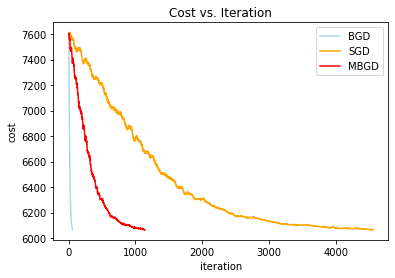

(0.0265653133392334, 0.5478208065032959, 0.26490187644958496)

In [ ]:
t_BGD, t_SGD , t_MBGD = SVM()
t_BGD, t_SGD , t_MBGD

Time elapsed when not computing loss every minibatch (unit: second)

In [ ]:
t_BGD, t_SGD , t_MBGD = SVM(False)
t_BGD, t_SGD , t_MBGD

(0.021015644073486328, 0.3244171142578125, 0.17721104621887207)